## 算法设计与分析 实验一：排序算法
- 2019-03-06

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import time
%matplotlib inline

In [2]:
def getRamdonArray(n):
    array = []
    for i in range(n):
        temp_int = random.randint(0,1000)
        array.append(temp_int)
    return array

# operation_scale = [100,200,500,1000,2000,5000,7000,10000]
operation_scale = [10,50,100,200,500,1000,1500,3000]
operation_scale2 = [11,51,101,201,501,1001,1501,3001]

def drawPicture(list_time,label):
    
    l1=plt.plot(operation_scale,list_time,'purple',label=label) # 'purple' is the color for label
    plt.plot(operation_scale,list_time,'purple')
    plt.title('Line chart of run time and scale')
    plt.xlabel('sacle')
    plt.ylabel('run time')
    plt.legend()
    plt.show()

def drawAllInOne(list_time1,list_time2,list_time3,list_time4,list_time5,list_time6,list_time7):
    
    l1=plt.plot(operation_scale,list_time1,'black',label='insert sort')
    l2=plt.plot(operation_scale,list_time2,'green',label='merge sort')
    l3=plt.plot(operation_scale,list_time3,'purple',label='quick sort')
    l4=plt.plot(operation_scale,list_time4,'gold',label='randomized quick sort')
    l5=plt.plot(operation_scale,list_time5,'peru',label='counting sort')
    l6=plt.plot(operation_scale,list_time6,'red',label='radix sort')
    l7=plt.plot(operation_scale,list_time7,'pink',label='bucket sort')
    
    plt.plot(operation_scale,list_time1,'black',
             operation_scale,list_time2,'green',
             operation_scale,list_time3,'purple',
             operation_scale,list_time4,'gold',
             operation_scale,list_time5,'peru',
             operation_scale,list_time6,'red',
             operation_scale,list_time7,'pink')
    plt.title('Line chart of run time and scale')
    plt.xlabel('sacle')
    plt.ylabel('run time')
    plt.legend()
#     plt.rcParams['figure.figsize'] = (18.0, 20.0)
    plt.show()
    
    
# calculate time
# start = datetime.datetime.now()
# DoSomething()
# end = datetime.datetime.now()
# print (end-start)

===> before sort: [553, 807, 150, 68, 426, 894, 62, 637, 990, 78]
===> after sort:  [62, 68, 78, 150, 426, 553, 637, 807, 894, 990]


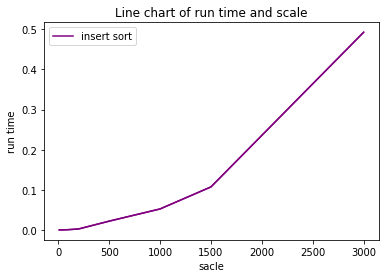

In [3]:
'''
1.插入排序算法
'''
def insert_sort(lists):
    # 插入排序
    count = len(lists)
    for i in range(1, count):
        key = lists[i]
        j = i - 1
        while j >= 0:
            if lists[j] > key:
                lists[j + 1] = lists[j]
                lists[j] = key
            j -= 1
    return lists

list_time1 = []
for i in range(len(operation_scale)):
    n = operation_scale[i]
    array = getRamdonArray(n)
    if i == 0:
        print("===> before sort:",array)
    start = time.time()
    result = insert_sort(array)
    end = time.time()
    if i == 0:
        print("===> after sort: ",result)
    run_time = end-start
    list_time1.append(run_time)
    
drawPicture(list_time1,'insert sort')
    

===> before sort: [792, 881, 413, 842, 725, 596, 454, 48, 921, 903, 192]
===> after sort:  [48, 192, 413, 454, 596, 725, 792, 842, 881, 903, 921]
===> before sort: [287, 984, 70, 789, 776, 547, 933, 901, 648, 698]
===> after sort:  [70, 287, 547, 648, 698, 776, 789, 901, 933, 984]


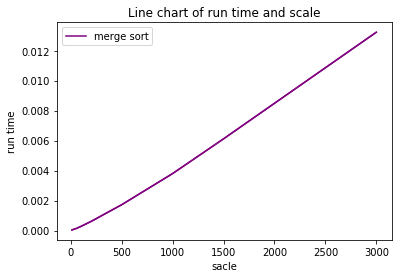

In [4]:
'''
2.合并排序算法
'''
def mergesort(seq):
    if len(seq) <= 1:
        return seq
    mid = int(len(seq) / 2)  
    left = mergesort(seq[:mid])
    right = mergesort(seq[mid:])

    return merge(left, right)

def merge(left, right):
    result = []  
    i = 0  
    j = 0
    
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result += left[i:]
    result += right[j:]
    return result

for i in range(len(operation_scale2)):
    n = operation_scale2[i]
    array = getRamdonArray(n)
    
    if i == 0:
        print("===> before sort:",array)    
    result = mergesort(array)
    if i == 0:
        print("===> after sort: ",result)

    
list_time2 = []
for i in range(len(operation_scale)):
    n = operation_scale[i]
    array = getRamdonArray(n)
    
    if i == 0:
        print("===> before sort:",array)  
    start = time.time()
    result = mergesort(array)
    end = time.time()
    if i == 0:
        print("===> after sort: ",result)
    run_time = end-start
    list_time2.append(run_time)
    
drawPicture(list_time2,'merge sort')

===> before sort: [299, 992, 960, 564, 999, 442, 50, 607, 847, 461]
===> after sort:  [50, 299, 442, 461, 564, 607, 847, 960, 992, 999]
===> before sort: [299, 992, 960, 564, 999, 442, 50, 607, 847, 461]
===> after sort:  [50, 299, 442, 461, 564, 607, 847, 960, 992, 999]


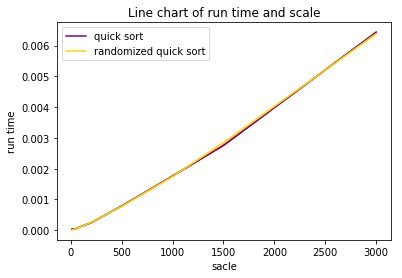

In [5]:
'''
3.快速排序算法
4.随机快速排序算法
'''
import copy

def quick_sort(lists, left, right):
    # 快速排序
    if left >= right:
        return lists
    key = lists[left]
    low = left
    high = right
    while left < right:
        while left < right and lists[right] >= key:
            right -= 1
        lists[left] = lists[right]
        while left < right and lists[left] <= key:
            left += 1
        lists[right] = lists[left]
    lists[right] = key
    quick_sort(lists, low, left - 1)
    quick_sort(lists, left + 1, high)
    return lists

def randomized_quicksort(A,p,r):
    if p<r:
        q=randomized_partition(A,p,r)
        randomized_quicksort(A,p,q-1)
        randomized_quicksort(A,q+1,r)
 
 
def randomized_partition(A,p,r):
    i = random.randint(p,r)
    t=A[r]
    A[r]=A[i]
    A[i]=t
    x=A[r]
    i=p-1
    for j in range(p,r):
        if A[j]<x:
            i+=1
            t=A[i]
            A[i]=A[j]
            A[j]=t
    A[r]=A[i+1]
    A[i+1]=x
    
    
list_time3 = []
list_time4 = []
for i in range(len(operation_scale)):
    n = operation_scale[i]
    
    array = getRamdonArray(n)
    copy_array = copy.deepcopy(array)
    
    if i == 0:
        print("===> before sort:",array)  
    start = time.time()
    result = quick_sort(array,0,len(array)-1)
    end = time.time()
    if i == 0:
        print("===> after sort: ",result)
    run_time = end-start
    list_time3.append(run_time)
    
    if i == 0:
        print("===> before sort:",copy_array)  
    start = time.time()
    result = quick_sort(copy_array,0,len(copy_array)-1)
    end = time.time()
    if i == 0:
        print("===> after sort: ",result)
    run_time = end-start
    list_time4.append(run_time)
    
    
# drawPicture(list_time3,'quick sort')
# drawPicture(list_time4,'randomized quick sort')


l3=plt.plot(operation_scale,list_time3,'purple',label='quick sort')
l4=plt.plot(operation_scale,list_time4,'gold',label='randomized quick sort')

    
plt.plot(operation_scale,list_time3,'purple',
        operation_scale,list_time4,'gold',)
plt.title('Line chart of run time and scale')
plt.xlabel('sacle')
plt.ylabel('run time')
plt.legend()
plt.show()

===> before sort: [618, 6, 541, 685, 728, 677, 157, 58, 302, 799]
===> after sort:  [6, 58, 157, 302, 541, 618, 677, 685, 728, 799]


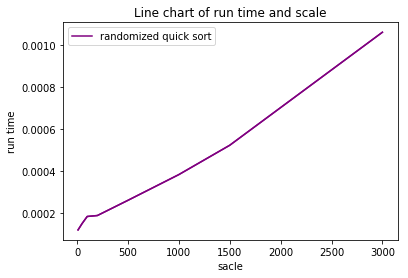

In [6]:
'''
5.计数排序算法
'''
def counting_sort(a, k):  
    n = len(a)
    b = [0 for i in range(n)]  
    c = [0 for i in range(k + 1)]  
    for j in a:
        c[j] = c[j] + 1
    for i in range(1, len(c)):
        c[i] = c[i] + c[i-1]
    for j in a:
        b[c[j] - 1] = j
        c[j] = c[j] - 1
    return b

list_time5 = []
for i in range(len(operation_scale)):
    n = operation_scale[i]
    array = getRamdonArray(n)
    max_item = max(array)
    if i == 0:
        print("===> before sort:",array)  
    start = time.time()
    result = counting_sort(array,max_item)
    end = time.time()
    if i == 0:
        print("===> after sort: ",result)
    run_time = end-start
    list_time5.append(run_time)
    
drawPicture(list_time5,'randomized quick sort')

===> before sort: [151, 282, 892, 512, 338, 748, 366, 729, 52, 491]
===> after sort:  [52, 151, 282, 338, 366, 491, 512, 729, 748, 892]


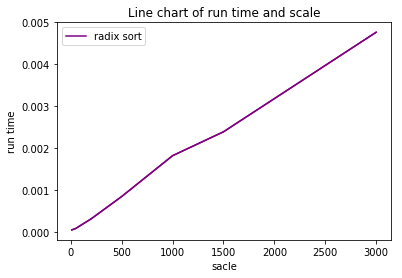

In [7]:
'''
6.基数排序算法
'''
def RadixSort(list,d):    
    for k in range(d):#d轮排序
        s=[[] for i in range(10)]
        for i in list:
            m=int(i/(10**k)%10)
            s[m].append(i) 
        list=[j for i in s for j in i]
    return s

def flat(l):
    for k in l:
        if not isinstance(k, (list, tuple)):
            yield k
        else:
            yield from flat(k)

list_time6 = []
for i in range(len(operation_scale)):
    n = operation_scale[i]
    array = getRamdonArray(n)
    if i == 0:
        print("===> before sort:",array)  
    start = time.time()
    result = RadixSort(array,3)
    end = time.time()
    result = list(flat(result))
    
    if i == 0:
        print("===> after sort: ",result)
    run_time = end-start
    list_time6.append(run_time)
    
drawPicture(list_time6,'radix sort')

===> before sort: [239, 852, 248, 615, 935, 259, 814, 514, 707, 15]
===> after sort:  [15, 239, 248, 259, 514, 615, 707, 814, 852, 935]


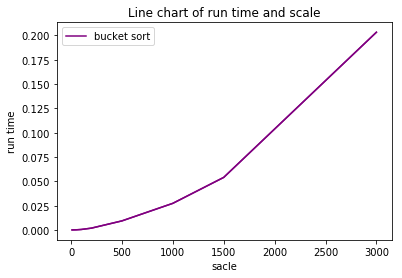

In [8]:
'''
7.桶排序算法
'''
def bucket_sort(a):
    buckets = [0] * ((max(a) - min(a)) + 1)  # 初始化桶元素为0
    for i in range(len(a)):
        buckets[a[i] - min(a)] += 1  # 遍历数组a，在桶的相应位置累加值
    b = []
    for i in range(len(buckets)):
        if buckets[i] != 0:
            b += [i + min(a)] * buckets[i]
    return b

list_time7 = []
for i in range(len(operation_scale)):
    n = operation_scale[i]
    array = getRamdonArray(n)
    if i == 0:
        print("===> before sort:",array) 
    start = time.time()
    result = bucket_sort(array)
    end = time.time()
    if i == 0:
        print("===> after sort: ",result)
    run_time = end-start
    list_time7.append(run_time)
    
drawPicture(list_time7,'bucket sort')

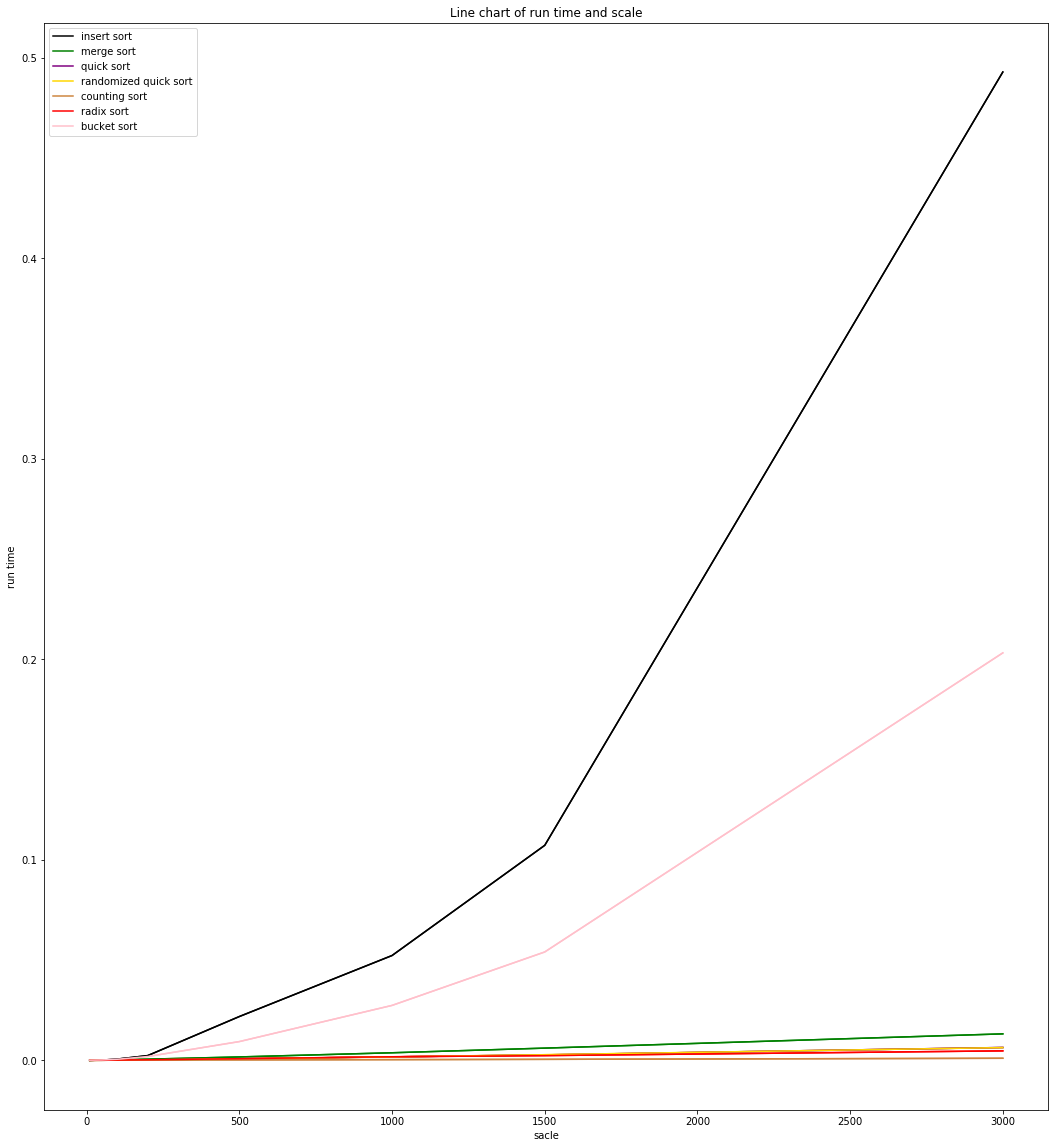

In [10]:
'''
把七种排序算法的曲线作在一张图上
'''
plt.rcParams['figure.figsize'] = (18.0, 20.0)
drawAllInOne(list_time1,list_time2,list_time3,list_time4,list_time5,list_time6,list_time7)